------

# HOMEWORK 3

### Instructions
This homework is based on Neural Networks and Pytorch deep learning framework.
After finishing this homework, you will be able to train a multilayer neural network using Pytorch, and solve image recognition/classification task.

You have to read and run all the cell in the provided notebook, and then work on the assigments. 

There are four sections on the notebook identified as 
- PART 1 - What is Pytorch? 
- PART 2 - Automatic Differentiation 
- PART 3 - Multilayer Perceptrons  
- PART 4 - MNIST - Feed-Forward Neural Networks
- PART 5 - CIFAR - Convolutional Neural Networks (optional assignment)


At the end of each part, you can find your assignments which you are supposed to work on. You will need to create a cell after each assignment and provide your solutions.

Submit your solutions as a jupyter ***.ipynb*** notebooks to the moodle. 

***Due date: April 23, midnight***

You can use https://colab.research.google.com/, or local laptop to work on these tasks. 


---------

# PART 1 - What is PyTorch?


It’s a Python based scientific computing package targeted at two sets of
audiences:
-  A replacement for numpy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed  


### Director of AI at Tesla

![Andrei-Karpathy](https://www.dropbox.com/s/dt2vvxafq1owehy/andrei-karpathy.png?dl=1)

# Getting Started

In this notebook you will get a quick start on what pytorch is and how to use it.

## 1. Tensors

Tensors are similar to numpy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.

In [ ]:
import torch

Construct a 5x3 matrix, uninitialized

In [ ]:
x = torch.Tensor(5, 3)
print(x)

Construct a randomly initialized matrix

In [ ]:
x = torch.rand(5, 3)
print(x)

Get its size

In [ ]:
print(x.size())

**NOTE** `torch.Size` is in fact a tuple, so it supports the same operations

----
### Part 1 -- Assignment (a)

1. Make a tensor of size (2, 17)
2. Make a torch.FloatTensor of size (3, 1)
3. Make a torch.LongTensor of size (5, 2, 1)
  - fill the entire tensor with 7s
4. Make a torch.ByteTensor of size (5,)
  - fill the middle 3 indices with ones such that it records [0, 1, 1, 1, 0]

-----------------
## 2. Operations
There are multiple syntaxes for operations. Let's see addition as an example:

### 2.1 Addition: syntax 1

In [ ]:
y = torch.rand(5, 3)

In [ ]:
print(x + y)

### 2.2 Addition: syntax 2

In [ ]:
print(torch.add(x, y))

### 2.3 Addition: giving an output tensor

In [ ]:
result = torch.Tensor(5, 3)

In [ ]:
torch.add(x, y, out = result)
print(result)

### 2.4 Addition: in-place

adds `x`to `y`

In [ ]:
y

In [ ]:
y.add_(x)
print(y)

**NOTE** Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

You can use standard numpy-like indexing with all bells and whistles!

In [ ]:
print(x[:, 1])

In [ ]:
print(x.shape)

In [ ]:
print(y.shape)

In [ ]:
y.mul_?

**Read later** 100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described here <http://pytorch.org/docs/torch>

----
### Part 1 - Assignment (b)

1. multiply of two tensors (see [torch.Tensor.mul](http://pytorch.org/docs/master/tensors.html#torch.Tensor.mul))
2. do the same, but inplace
3. division of two tensors (see [torch.Tensor.div](http://pytorch.org/docs/master/tensors.html#torch.Tensor.div))
4. perform a matrix multiplication of two tensors of size (2, 4) and (4, 2)

---------
## 3. Numpy Bridge

Converting a torch Tensor to a numpy array and vice versa is a breeze.

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

### 3.1 Converting torch Tensor to numpy Array

In [ ]:
a = torch.ones(5)
print(a)
type(a)

In [ ]:
x

In [ ]:
type(x)

In [ ]:
x.numpy()

In [ ]:
b = a.numpy()

print(b)
type(b)

See how the numpy array changed in value.

In [ ]:
# in place addition 
a.add_(1)

print(a)
print(b)

In [ ]:
b

### 3.2 Converting numpy Array to torch Tensor

See how changing the np array changed the torch Tensor automatically

In [ ]:
import numpy as np
xx = np.random.rand(16, 153, 100)
print(xx.shape)

# convert to a pytorch tensor 
b = torch.from_numpy(xx)
print(b.shape)

# add ones - this happens in place 
a1  = np.add(a.numpy(), 1)
type(a1)

a2 = torch.from_numpy(a1)
type(a2)

---- 
### Part 1 - Assignment (c)

1. create a tensor of size (5, 2) containing ones
2. now convert it to a numpy array
3. now convert it back to a torch tensor
___

All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

## 4 CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [ ]:
torch.cuda.is_available()

In [ ]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():    
    x = x.cuda()
    y = y.cuda()    
    z = x + y
    # notice that the tensors are now of type torch.cuda.FloatTensor (notice the cuda in there)
    # this is meant as a tensor to be run on the GPU.
    # the .cuda() does this to any parameter it is applied to
    print(x)
    print(y)
    print(z)
else:
    print("CUDA not available on your machine.")

-----

# PART 2 - Autograd: automatic differentiation

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our first neural network.

The `autograd` package provides automatic differentiation for all operations on Tensors.
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

## 1. Variable

`autograd.Variable` is the central class of the package. It wraps a Tensor, and supports nearly all of operations defined on it.
Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

There’s one more class which is very important for autograd implementation - a `Function`.

`Variable` and `Function` are interconnected and build up an `acyclic graph`, that encodes a complete history of computation. Each variable has a `.grad_fn` attribute that references a `Function` that has created the `Variable` (except for `Variable`s created by the user - their `grad_fn` is `None`).

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. If `Variable` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `grad_output` argument that is a tensor of matching shape.

In [ ]:
import torch
from torch.autograd import Variable

In [ ]:
%matplotlib inline

Create a variable

In [ ]:
f(x) = Wx + b

In [ ]:
W = Variable(torch.ones(2, 2), 
             requires_grad=True)
print(x)

Do an operation of variable:

In [ ]:
y = x + 2
print(y)

`y` was created as a result of an operation, so it has a `grad_fn`.

In [ ]:
print(y.grad_fn)

Do more operations on y

$z = 3*(x+2)^2$

y = x + 2

In [ ]:
z = 3* y * y  

$out = \frac{1}{N}\sum_{i}^{N} 3(x_{i} + 2)^2$

In [ ]:
out = z.mean()

In [ ]:
print(z)
print(out)

## 2. Gradients

Let’s backprop now `out.backward()` is equivalent to doing `out.backward(torch.Tensor([1.0]))`

In [ ]:
out.backward()

In [ ]:
print(out)
print(x)

print gradients d(out)/dx

In [ ]:
print(x.grad)

You should have got a matrix of `4.5`. Let’s call the `out` *Variable* $o$.

We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.

Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$,
hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

`You can do many crazy things with autograd!`

In [ ]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

In [ ]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

**Read later**
Documentation of `Variable` and `Function` is at http://pytorch.org/docs/autograd

----------
### Part 2 - Assignments (a)

1. Define a tensor
2. Convert the tensor to a torch.Variable that requires_grad
3. Multiply the torch.Variable with 2 and assign the result to a new python variable (i.e. `x = result`)
4. Sum the variable's elements and assign to a new python variable
5. Print the gradients of all the variables
6. Now perform a backward pass on the last variable
7. Print all gradients again
  - what did you notice?

---------------


# PART 3 - MULTILAYER PERCEPTRONS
In the following notebook you will implement a simple neural network in PyTorch.

The building blocks of `PyTorch` are `Tensors`, `Variables` and `Operations`, with these we can form `dynamic computational graphs` that form neural networks.

In this exercise we'll start right away by defining a logistic regression model using these simple building blocks.

We'll initially start with a simple 2D and two-class classification problem where the class decision boundary can be visualized.

Initially we show that logistic regression can only separate classes linearly.
Adding a nonlinear hidden layer to the algorithm permits nonlinear class separation.

In this notebook you should:
* **First** run the code as is, and see what it does.
* **Then** modify the code, following the instructions in the bottom of the notebook.
* **Lastly** play a round a bit, and do some small experiments that you come up with.

> We assume that you are already familiar with backpropagation (if not please see [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) or [Michal Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html)).

## Dependancies and supporting functions
Loading dependancies and supporting functions by running the code block below.

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# Do not worry about the code below for now, it is used for plotting later
def plot_decision_boundary(pred_func, X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap=plt.cm.Spectral)

In [ ]:
def onehot(t, num_classes):    
    out = np.zeros((t.shape[0], num_classes))    
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

## Problem 
We'll initally demonstrate the that Multi-layer Perceptrons (MLPs) can classify nonlinear problems, whereas simple logistic regression cannot.
For ease of visualization and computationl speed we initially experiment on the simple 2D half-moon dataset, visualized below.

In [ ]:
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 300

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

print(X.shape)
print(y.shape)

### Define train, validation, and test sets

In [ ]:
X_tr = X[:100].astype('float32')
print('Train set:', X_tr.shape)

X_val = X[100:200].astype('float32')
print('Validation set:', X_val.shape)

X_te = X[200:].astype('float32')
print('Test set:', X_te.shape)

In [ ]:
# and labels
y_tr = y[:100].astype('int32')
y_val = y[100:200].astype('int32')
y_te = y[200:].astype('int32')

In [ ]:
plt.scatter(X_tr[:,0], X_tr[:,1], s=40, c=y_tr, cmap=plt.cm.Spectral)
print(X.shape, y.shape)

num_features = X_tr.shape[-1]
print('Number of features:>>', num_features)

num_output = 2
print('Number of outputs:>>', num_output)

## From Logistic Regression to "Deep Learning"
The code implements logistic regression. In section [__Assignments Half Moon__](#Assignments-Half-Moon) (bottom of this notebook) you are asked to modify the code into a neural network.

The standard building block for neural networks are layers.
The simplest of which is called a `dense feed forward layer`, and it is computed as follows:

$$y = \mathrm{nonlinearity}(xW + b)$$

where $x$ is the input vector, $y$ is the output vector, and $W, b$ are the weights (a matrix and vector respectively).
The *dense* part of the name comes from the fact that every element of $x$ contributes to every element of $y$.
And the *feed forward* part of the name means that the layer processes each input independently. 
If we were to draw the layer it would be acyclical.
Later we will se layers that break both of these conventions.

- $x$ has shape `[batch_size, num_features]`,
- $W$ has shape `[num_features, num_units]`,
- $b$ has `[num_units]`, and
- $y$ has then `[batch_size, num_units]`

## PyTorch 101

In this first exercise we will use basic PyTorch functions so that you can learn how to build it from scratch. This will help you later if you want to build your own custom operations.

In [ ]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter # A kind of Tensor that is to be considered a module parameter.

import torch.nn as nn # Base class for all neural network modules.
import torch.nn.functional as F # Functional interface  

[`Parameters`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Parameter) are [`Variable`](http://pytorch.org/docs/0.1.12/autograd.html#torch.autograd.Variable) subclasses, that have a very special property when used with [`Module`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module)'s - when they’re assigned as `Module` attributes they are automatically added to the list of its parameters, and will appear e.g. in [`.parameters()`](http://pytorch.org/docs/0.1.12/nn.html#torch.nn.Module.parameters) iterator.
Assigning a Variable doesn’t have such effect.
This is because one might want to cache some temporary state (more on this later) in the model.
If there was no such class as `Parameter`, these temporaries would get registered too.

#### nn.Linear(in_features, out_features, bias=True)
#### Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to False, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(N, *, in\_features)` where :math:`*` means any number of
      additional dimensions
    - Output: :math:`(N, *, out\_features)` where all but the last dimension
      are the same shape as the input.

Attributes:
    weight: the learnable weights of the module of shape
        `(out_features x in_features)`
    bias:   the learnable bias of the module of shape `(out_features)`

Examples::

    >>> m = nn.Linear(20, 30)
    >>> input = torch.randn(128, 20)
    >>> output = m(input)
    >>> print(output.size())

In [ ]:
class LogisticRegression(nn.Module):    
    def __init__(self):                 
        super(LogisticRegression, self).__init__()              
        self.W_1 = Parameter(torch.randn(num_output, num_features)) 
        self.b_1 = Parameter(torch.randn(num_output))
        
    def forward(self, x):             
        # Applies a linear transformation :math:`y = xW^T + b` 
        x = F.linear(x, self.W_1, self.b_1)
        x = F.softmax(x, dim = 1)
        return x    

In [ ]:
net = LogisticRegression()
print(net)

------
## A softmax function.

Softmax is defined as:

$\text{Softmax}(x_{i}) = \frac{exp(x_i)}{\sum_j exp(x_j)}$

It is applied to all slices along dim, and will re-scale them so that the elements
lie in the range `(0, 1)` and sum to 1.

See :class:`~torch.nn.Softmax` for more details.

Arguments:
    input (Tensor): input
    dim (int): A dimension along which softmax will be computed.

.. note::
    This function doesn't work directly with NLLLoss,
    which expects the Log to be computed between the Softmax and itself.
    Use log_softmax instead (it's faster and has better numerical properties).
    


Knowing how to print your tensors is useful

In [ ]:
print("NAMED PARAMETERS")
print(list(net.named_parameters()))

In [ ]:
# the parameters() method simply gives the Tensors in the list
print("PARAMETERS")
print(list(net.parameters()))
print()

In [ ]:
# list individual parameters by name
print('WEIGHTS')
print(net.W_1)
print(net.W_1.size())

In [ ]:
print('\nBIAS')
print(net.b_1)
print(net.b_1.size())

## Exploring Parameter

Ok, let's investigate what a `Parameter`/`Variable` is

In [ ]:
param = net.W_1
print(param)

In [ ]:
print("## this is the tensor")
print(param.data)

print("\n## this is the tensor's gradient")
print(param.grad)
# notice, the gradient is undefined because we have not yet run a backward pass

print("\n## is it a leaf in the graph?")
print(param.is_leaf)

## Excluding subgraphs from backward propagation

`Variable`s have two properties which allow you to define if a graph is going to be used for training or inference, `requires_grad` and `volatile`.
During training we might not want to compute the gradients for all layers, e.g. if we have a pretrained model or embeddings that we do not want to change the values of.

To compute gradients we need to store activations and compute the backward pass for the given layer.
Setting `requires_grad = False` will allow you to circumvent these properties.
If any paramater in an operation / layer requires gradient then the entire output of the operation will also require gradient.

The `volatile` property is mostly used when you want to run inference with your model, and if it is set to `True` the entire graph will not require gradient. This means that you expect to never call `.backward()` on the network.

See http://pytorch.org/docs/master/notes/autograd.html for an in-depth explanation.

## Test network

To use our network we can simply call our graph, and it will dynamically be created. Here is an example of running the network's forward pass.

In [ ]:
num_neurons = 5
X = Variable(torch.randn(num_neurons, num_features))

print('input')
print(X)
print(X.shape)

In [ ]:
# pass through the NN
print('\noutput')
print(net(X))

In [ ]:
print('\nWEIGHT')

param = net.W_1
print(param)

print('\nBIAS')
print(net.b_1)

Parameters is a special case of Variable 

In [ ]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

In [ ]:
X = Variable(torch.randn(7, num_features))
out = net(X)
print(out)

In [ ]:
# we need to give a tensor of gradients to .backward,
# we give a dummy tensor
out.backward(torch.randn(7, num_features))

for details on `.backward()`, see http://pytorch.org/docs/master/autograd.html#torch.autograd.backward

In [ ]:
# let's take a look at the gradients
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

In [ ]:
# ok, let's try and zero the accumulated gradients
net.zero_grad()
for p in net.parameters():
    print('DATA >>>', p.data)
    print('GRADIENT >>>', p.grad)
    print()

## Loss function

Let's define a custom loss function to compute how good our graph is doing.

In [ ]:
# ys - estimated # ts - target output 
def cross_entropy(ys, ts):      
    # computing cross entropy per sample
    cross_entropy = -torch.sum(ts * torch.log(ys), dim=1, keepdim=False)        
    # averaging over samples
    average = torch.mean(cross_entropy)        
    return average

To train our neural network we need to update the parameters in direction of the negative gradient w.r.t the cost function we defined earlier.
We can use [`torch.optim`](http://pytorch.org/docs/master/optim.html) to get the gradients with some update rule for all parameters in the network.

Heres a small animation of gradient descent: http://imgur.com/a/Hqolp, which also illustrates which challenges optimizers might face, e.g. saddle points.

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01)

Next, we make the prediction functions, such that we can get an accuracy measure over a batch

In [ ]:
def accuracy(ys, ts):    
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = torch.eq(torch.max(ys, 1)[1], torch.max(ts, 1)[1])        
    # averaging the one-hot encoded vector
    Average = torch.mean(correct_prediction.float())
    return Average

The next step is to utilize our `optimizer` repeatedly in order to optimize our weights `W_1` and `b_1` to make the best possible linear seperation of the half moon dataset.

In [ ]:
# number of training passses
num_epochs = 1000

# store loss and accuracy for information
train_losses, val_losses, train_accs, val_accs = [], [], [], []

def pred(X):
    """ Compute graph's prediction and return numpy array    
    Parameters
    ----------
    X : numpy.ndarray    
    Returns
    -------
    numpy.ndarray
    """
    X = Variable(torch.from_numpy(X))
         
    # forward pass 
    y = net(X)    
    return y.data.numpy()

In [ ]:
# plot boundary on testset before training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Untrained Classifier")

In [ ]:
import pdb

In [ ]:
# training loop
for e in range(num_epochs):
    # get training input and expected output as torch Variables and 
    # make sure type is correct
    
    tr_input = Variable(torch.from_numpy(X_tr))
    tr_targets = Variable(torch.from_numpy(onehot(y_tr, num_output))).float()
    
    # zero accumulated gradients in parameters
    optimizer.zero_grad()
    
    #+++++++++++ TRAIN STEP ++++++++++++++++
    # predict by running forward pass
    tr_output = net(tr_input)     
    # pdb.set_trace()
    
    # compute cross entropy loss
    tr_loss = cross_entropy(tr_output, tr_targets)    
   
    # compute gradients given loss
    tr_loss.backward()   
    
    # update the parameters given the computed gradients
    # Performs a single optimization step
    optimizer.step()
    
    train_acc = accuracy(tr_output, tr_targets)
    
    # store training loss
    train_losses.append(tr_loss.data.numpy())
    train_accs.append(train_acc)
    #+++++++++++++++++++++++++++++++++++++++
    """    at each step/epoch USE the trained net() 
    to evaluate it on the validation set
    - Note however that the update is not happening
    after the validation step.
    
    tr_loss.backward() ->>> does the backprop 
    optimizer.step() ->>> does the weight update    
    """    
    #+++++++++++ VALIDATION STEP ++++++++++++++++
    # get validation input and expected output as torch Variables 
    # and make sure type is correct
    val_input = Variable(torch.from_numpy(X_val))
    val_targets = Variable(torch.from_numpy(onehot(y_val, num_output))).float()
    
    # predict with validation input
    val_output = net(val_input)
    
    # compute loss and accuracy
    val_loss = cross_entropy(val_output, val_targets)
    val_acc = accuracy(val_output, val_targets)
    
    # store loss and accuracy
    val_losses.append(val_loss.data.numpy())
    val_accs.append(val_acc.data.numpy())
    #+++++++++++++++++++++++++++++++++++++++
        
    if e % 100 == 0:
        print("Epoch %i, "
              "Train Cost: %0.3f"
              "\tVal Cost: %0.3f"
              "\t Val acc: %0.3f" % (e, 
                                     train_losses[-1],
                                     val_losses[-1],
                                     val_accs[-1]))        

In [5]:
pwd

'/home/berdakh/robt407h3'

In [ ]:
# get test input and expected output
te_input = Variable(torch.from_numpy(X_te))
te_targets = Variable(torch.from_numpy(onehot(y_te, num_output))).float()

# predict on testset
te_output = net(te_input)

# compute loss and accuracy
te_loss = cross_entropy(te_output, te_targets)
te_acc = accuracy(te_output, te_targets)
print("\nTest Cost: %0.3f\tTest Accuracy: %0.3f" % (te_loss.data.numpy(), te_acc.data.numpy()))

# plot boundary on testset after training session
plot_decision_boundary(lambda x: pred(x), X_te, y_te)
plt.title("Trained Classifier")

plt.figure()
epoch = np.arange(len(train_losses))
plt.plot(epoch, train_losses, 'r', label='Train Loss')
plt.plot(epoch, val_losses, 'b', label='Val Loss')
plt.legend()
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(epoch, train_accs, 'r', label='Train Acc')
plt.plot(epoch, val_accs, 'b', label='Val Acc')
plt.legend()
plt.xlabel('Updates')
plt.ylabel('Accuracy')
plt.show()

-----------
### Part 3 - Assignments

1. A linear logistic classifier is only able to create a linear decision boundary. Change the Logistic classifier into a (nonlinear) Neural network by inserting a dense hidden layer between the input and output layers of the model
 
2. Experiment with multiple hidden layers or more / less hidden units. What happens to the decision boundary?
 
3. Overfitting: When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is to complex it will often generalize poorly to new data (validation and test set). Can you observe this from the training and validation errors? 
 
4. We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. Try changing the optimizer to [adam or momentum](http://pytorch.org/docs/master/optim.html#torch.optim.Adam)

--------------------------------------
# PART 4 - MNIST Feed-Forward Neural Networks 

In [6]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### MNIST dataset
MNIST is a dataset that is often used for benchmarking. The MNIST dataset consists of 70,000 images of handwritten digits from 0-9. The dataset is split into a 50,000 images training set, 10,000 images validation set and 10,000 images test set. The images are 28x28 pixels, where each pixel represents a normalised value between 0-255 `(0=black and 255=white)`.

http://yann.lecun.com/exdb/mnist/

### Primer
We use a feedforward neural network to classify the 28x28 mnist images. `num_features` is therefore $28 * 28=784$, i.e. we represent each image as a vector. The ordering of the pixels in the vector does not matter, so we could permutate all images using the same permutation and still get the same performance. (You are of course encouraged to try this using ``numpy.random.permutation`` to get a random permutation. This task is therefore called the _permutation invariant_ MNIST. Obviously this throws away a lot of structure in the data. In the next module we'll fix this with the convolutional neural network wich encodes prior knowledgde about data that has either spatial or temporal structure.  

### MNIST
First let's load the MNIST dataset and plot a few examples:

In [2]:
#!pip install wget
import wget

wget.download('https://github.com/berdakh/ROBT407/blob/master/mnist.npz')

'mnist (1).npz'

In [12]:
#To speed up training we'll only work on a subset of the data
data = np.load('mnist.npz')

In [15]:
num_classes = 10

data['X_train'].shape

(50000, 784)

In [16]:
#To speed up training we'll only work on a subset of the data
x_train = data['X_train'][:1000].astype('float32')
targets_train = data['y_train'][:1000].astype('int32')

x_valid = data['X_valid'][:500].astype('float32')
targets_valid = data['y_valid'][:500].astype('int32')

x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)
print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)
print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)
print("targets_test", targets_test.shape)

Information on dataset
x_train (1000, 784)
targets_train (1000,)
x_valid (500, 784)
targets_valid (500,)
x_test (500, 784)
targets_test (500,)


In [ ]:
#plot a few MNIST examples
idx, dim, classes = 0, 28, 10
# create empty canvas
canvas = np.zeros((dim*classes, classes*dim))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim] = x_train[idx].reshape((dim, dim))
        idx += 1

# visualize matrix of tensors as gray scale image
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

## Model

One of the large challenges in deep learning is the amount of hyperparameters that needs to be selected, and the lack of a good principled way of selecting them.
Hyperparameters can be found by experience (guessing) or some search procedure (often quite slow).
Random search is easy to implement and performs decent: http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf . 
More advanced search procedures include [Spearmint](https://github.com/JasperSnoek/spearmint) and many others.

**In practice a lot of trial and error is almost always involved.** This can be frustrating and time consuming, but the best thing to do is to think as a scientist, and go about it in a ordered manner --> monitor as much as you can, take notes, and be deliberate!

Below are some guidelines that you can use as a starting point to some of the most important hyperparameters. 
(*regularization* is also very important, but will be covered later.)


### Ballpark estimates of hyperparameters
__Number of hidden units and network structure:__
You'll have to experiment. One rarely goes below 512 units for feedforward networks (unless your are training on CPU...).
There's some research into stochastic depth networks: https://arxiv.org/pdf/1603.09382v2.pdf, but in general this is trial and error.

__Parameter initialization:__
Parameter initialization is extremely important.
PyTorch has a lot of different initializers, check the [PyTorch API](http://pytorch.org/docs/master/nn.html#torch-nn-init). Often used initializer are
1. Kaming He
2. Xavier Glorot
3. Uniform or Normal with small scale (0.1 - 0.01)
4. Orthogonal (this usually works very well for RNNs)

Bias is nearly always initialized to zero using the [torch.nn.init.constant(tensor, val)](http://pytorch.org/docs/master/nn.html#torch.nn.init.constant)

__Mini-batch size:__
Usually people use 16-256. Bigger is not allways better. With smaller mini-batch size you get more updates and your model might converge faster. Also small batch sizes use less memory, which means you can train a model with more parameters.

__Nonlinearity:__ [The most commonly used nonliearities are](http://pytorch.org/docs/master/nn.html#non-linear-activations)
1. ReLU
2. Leaky ReLU
3. Elu
3. Sigmoid squash the output [0, 1], and are used if your output is binary (not used in the hidden layers)
4. Tanh is similar to sigmoid, but squashes in [-1, 1]. It is rarely used any more.
4. Softmax normalizes the the output to 1, and is used as output if you have a classification problem

See the plot below.

__Optimizer and learning rate:__
1. SGD + Momentum: learning rate 1.0 - 0.1 
2. ADAM: learning rate 3*1e-4 - 1e-5
3. RMSPROP: somewhere between SGD and ADAM

SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. It is one of the most popular optimization algorithms and many state-of-the-art models are trained using it.

In [ ]:
# Illustrate different output units
x = np.linspace(-6, 6, 100)

units = {
    "ReLU": lambda x: np.maximum(0, x),
    "Leaky ReLU": lambda x: np.maximum(0, x) + 0.1 * np.minimum(0, x),
    "Elu": lambda x: (x > 0) * x + (1 - (x > 0)) * (np.exp(x) - 1),
    "Sigmoid": lambda x: (1 + np.exp(-x))**(-1),
    "tanh": lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    }

plt.figure(figsize=(5, 5))
[plt.plot(x, unit(x), label=unit_name, lw=2) for unit_name, unit in units.items()]
plt.legend(loc=2, fontsize=16)
plt.title('Non-linearities', fontsize=20)
plt.ylim([-2, 5])
plt.xlim([-6, 6])
# assert that all class probablities sum to one
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
print("softmax should sum to one (approxiamtely):", np.sum(softmax(x)))

In [ ]:
#Hyperparameters
num_classes = 10
num_l1 = 512
num_features = x_train.shape[1]

In [ ]:
num_features

In [ ]:
# define network
class Net(nn.Module):
    def __init__(self, num_features, num_hidden, num_output):
        super(Net, self).__init__()  
        
        # input layer
        self.W_1 = Parameter(init.xavier_normal_(torch.Tensor(num_hidden, num_features)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden), 0))
        
        # hidden layer
        self.W_2 = Parameter(init.xavier_normal_(torch.Tensor(num_output, num_hidden)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        
        # define activation function in constructor
        self.activation = torch.nn.ELU()

    def forward(self, x):        
        x = F.linear(x, self.W_1, self.b_1)
        x = self.activation(x)
        
        x = F.linear(x, self.W_2, self.b_2)
        return F.softmax(x, dim=1)

In [ ]:
net = Net(num_features, num_l1, num_classes)

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [ ]:
#Test the forward pass with dummy data
x = np.random.normal(0, 1, (45, dim*dim)).astype('float32')

x = torch.from_numpy(x)

out = net(Variable(x)) 

# Build the training loop

We train the network by calculating the gradient w.r.t the cost function and update the parameters in direction of the negative gradient. 


When training neural network you always use mini batches. Instead of calculating the average gradient using the entire dataset you approximate the gradient using a mini-batch of typically 16 to 256 samples. The paramters are updated after each mini batch. Networks converge much faster using mini batches because the parameters are updated more often.

We build a loop that iterates over the training data. Remember that the parameters are updated each time ``optimizer.step()`` is called.

In [ ]:
# we could have done this ourselves,
# but we should be aware of sklearn and it's tools
from sklearn.metrics import accuracy_score

# setting hyperparameters and gettings epoch sizes
batch_size = 100
num_epochs = 100

num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size

num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

In [ ]:
# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)

In [ ]:
for epoch in range(num_epochs):
    # Forward -> Backprob -> Update weights
    ## Train
    cur_loss = 0
    net.train()    
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        # forward passing 
        output = net(x_batch)
        
        # compute gradients given loss
        target_batch = Variable(torch.from_numpy(targets_train[slce]).long())
        
        # loss function 
        batch_loss  = criterion(output, target_batch)        
        optimizer.zero_grad()
        
        # backpropogate 
        batch_loss.backward()
        
        # update weight 
        optimizer.step()        
        cur_loss += batch_loss   
        
    losses.append(cur_loss / batch_size)
    
    net.eval()    
    ## Evaluate training
    train_preds, train_targs = [], []
    
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_train[slce]))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        
        train_targs += list(targets_train[slce])
        train_preds += list(preds.data.numpy())
    
    ## Evaluate validation
    val_preds, val_targs = [], []
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        x_batch = Variable(torch.from_numpy(x_valid[slce]))        
        output = net(x_batch)
        
        preds = torch.max(output, 1)[1]
        val_preds += list(preds.data.numpy())
        val_targs += list(targets_valid[slce])

    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 10 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

In [ ]:
for ii in net.parameters():
    print(ii.shape)

In [ ]:
x_test = data['X_test'][:500].astype('float32')
targets_test = data['y_test'][:500].astype('int32')

xtest = torch.from_numpy(x_test)

tout = net(xtest)

tout.shape

In [ ]:
y = torch.from_numpy(targets_test)

preds = torch.max(tout, 1)[1]
testacc = accuracy_score(preds, y)

preds[:10]

In [ ]:
y[:10]

------------------
### Part 4 - Assignments 

Try and add these modifications (might require some Googleing -- an important skill in deep learning):
- Kaiming He initialization instead of Xavier Glorot
- add an extra layer
- use the relu activation function
- add momentum to the optimizer
- use the ADAM optimizer instead of stochastic gradient descent

### Advanced - Regularization

Regularization is VERY important in practice and is used practically every time.
Many important results are completely dependent on cleaver use of regularization, and it is something you need to become familiar with if you want to work with deep learning.

- add L1 or L2 weight regularization (aka. weight decay) 
- add dropout to the network (**note** the `net.train()` and `net.eval()` are already in the code)
- add batchnorm

__Pointers on regularization hyperparameter:__
1. L2 and [L1 regularization](http://pytorch.org/docs/master/nn.html#torch.nn.L1Loss) (weight decay of optimization functions) 
  - Normal ranges: 1e-4  -  1e-8
1. [Dropout](http://pytorch.org/docs/master/nn.html?highlight=dropout#torch.nn.Dropout). Dropout rate 0.1-0.5
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate random dropout, and call `net.eval()` to deactivate dropout while validating or running inference with model.
1. [Batchnorm](http://pytorch.org/docs/master/nn.html#torch.nn.BatchNorm1d): Batchnorm also acts as a regularizer - Often very useful (faster and better convergence)
  - Remember to pick the correct version according to the input dimensionality
  - **NOTE** call `net.train()` before training to activate, and call `net.eval()` to have a non-stochastic variant while validating or running inference with model.
    

-----------

# PART 5 (OPTIONAL ASSIGNMENT)

# CIFAR-10

In this notebook you need to put what you have learned into practice, and create your own convolutional classifier for the CIFAR-10 dataset.

The CIFAR dataset has the following classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’.
The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![cifar10](https://www.dropbox.com/s/n8g4k0x7dpxt42a/cifar.png?dl=1)

### To train a classifier the following steps needs to be performed:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

Most of these steps are done fore you. 
You only need to modify the codes with `# Your code here!`.

It is recommended to read the entire assignment before you begin coding!

## 1. Loading and normalizing CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]

**NB** Modify the code below to only use a small part of the dataset if your computer is very slow.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),
                          (0.5, 0.5, 0.5))]
)

In [ ]:
# Load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print()
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

In [4]:
## USE CODE BELOW IF YOUR COMPUTER IS TOO SLOW
reduce_dataset = True

if reduce_dataset:
    used_categories = (3, 5) # cats and dogs
    classes = [classes[i] for i in used_categories]
    new_train_data = []
    new_train_labels = []

    new_test_data = []
    new_test_labels = []
    
    for i, t in enumerate(used_categories):
        new_train_data.append(trainset.train_data[np.where(np.array(trainset.train_labels) == t)])
        new_train_labels += [i for _ in range(new_train_data[-1].shape[0])]

        new_test_data.append(testset.test_data[np.where(np.array(testset.test_labels) == t)])
        new_test_labels += [i for _ in range(new_test_data[-1].shape[0])]

    new_train_data = np.concatenate(new_train_data, 0)
    trainset.train_data = new_train_data
    trainset.train_labels = new_train_labels

    new_test_data = np.concatenate(new_test_data, 0)
    testset.test_data = new_test_data
    testset.test_labels = new_test_labels

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)
train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)
print('used classes:', classes)

used classes: ['cat', 'dog']


In [6]:
print("Training data")
print(trainset.train_data.shape)
print(len(trainset.train_labels))
print()

print("Test data")
print(testset.test_data.shape)
print(len(testset.test_labels))
print()

Training data
(10000, 32, 32, 3)
10000

Test data
(2000, 32, 32, 3)
2000



Let us show some of the training images, for fun.



       cat        dog        cat        dog


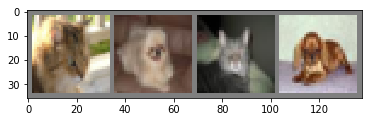

In [9]:
# Run this cell multiple time to see more samples
def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
images, labels = train_data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))

## 2. Define a Convolutional Neural Network

**Part5 - Assignment 1:** Define a two layer convolutional neural network. We suggest that you start with a small network, and make sure that everything is working. Once you can train successfully come back and improve the architecture

In [41]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6

class Net(nn.Module):
    
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.num_classes = num_classes
        
        self.h1 = F.Linear()        
        self.maxpool = MaxPool2d()
        
        self.h2 = F.Linear()
        # Your code here!

    def forward(self, x):
        # Your code here!
        
        return x
    

In [41]:
net = Net(len(used_categories))
print(net)

Net()


## 3. Define a Loss function and optimizer

**Part5 - Assignment 2:** Implement the criterion and optimizer. 
We suggest Classification Cross-Entropy loss and SGD with momentum.
You might need to experiment a bit with the learning rate.

In [ ]:
import torch.optim as optim

criterion = None  # Your code here!
optimizer = None  # Your code here!

## 4. Train the network

**Assignment 3:** Finish the training loop below. 
Start by using a small number of epochs (e.g. 3).
Even with a low number of epochs you should be able to see results that are better than chance.
When everything is working increase the number of epochs to find out how good your network really is.

In [ ]:
num_epoch = 3  # Your code here!

for epoch in range(num_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        # Your code here!

        # forward + backward + optimize
        # Your code here!

        # print statistics
        running_loss += loss.data[0]
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

## 5. Test the network on the test data

Now we need to check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and checking it against the ground truth.
If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

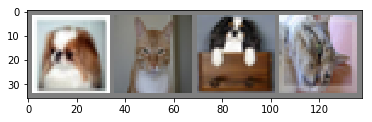

In [11]:
images, labels = test_data_iter.next()

# print images
imshow(torchvision.utils.make_grid(images))
plt.show()

In [ ]:
print('GroundTruth:  ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs.data, 1)
print('Predicted:    ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the {} test images: {:4.2f} %'.format(
    testset.test_data.shape[0], 100 * correct / total))

Hopefully the network is better than chance, which is $\frac{1}{\text{number of classes}}$ accuracy (randomly picking
a class).


We can also examine which class the network found the most difficult (makes more sense if you have many clases):

In [ ]:
class_total = list(0. for i in range(len(classes)))
class_correct = list(0. for i in range(len(classes)))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    
    for i in range(len(c)):
        label = labels[i]
        class_correct[label] += c[i].numpy()
        class_total[label] += 1

for i in range(len(classes)):
    print('Accuracy of {:5s} : {:5.2f} %'.format(
        classes[i], 100 * class_correct[i] / class_total[i]))

**Assignment 4:** 
1. Go back and improve performance of the network. 
 * If you are using all 10 classes you should get a test accuracy above 55%, but see how much further you can get it!
 * If you are using only 2 classes (e.g. cat and dog) you should get a test accuracy above 60%, but see how much further you can get it!

2. Briefly describe what you did and any experiments you did along the way as well as what results you obtained.
Did anything surprise you during the exercise?

3. Write down key lessons/insights you got (if any) during this exercise.

**Answer:**

# Training on GPU

**Part5 - Assignment:**
Try and rewrite the code above to run on the GPU (use Google Colab or your PCs should have a GPU).
___

Just like how you transfer a Tensor on to the GPU, you transfer the neural net onto the GPU.
This will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

```
    net.cuda()
```

Remember that you will have to send the inputs and targets at every step to the GPU too:

```
    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
```

Why dont I notice MASSIVE speedup compared to CPU? 
Because your network is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images


